`import library`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

`connect GoogleDrive`

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


`read data`

In [3]:
data= pd.read_csv('/content/drive/MyDrive/project/PORTODATA/credit_scoring/hmeq.csv')
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


* BAD : 1 = klien gagal bayar pinjaman; 0 = pinjaman dilunasi
* LOAN : Jumlah permintaan pinjaman
* MORTDUE : Jumlah yang harus dibayar pada hipotek yang ada
* VALUE : Nilai properti saat ini
* REASON : DebtCon = konsolidasi hutang; HomeImp = perbaikan rumah
* JOB : Enam kategori pekerjaan
* YOJ : Tahun bekerja saat ini
* DEROG : Jumlah laporan penghinaan utama
* DELINQ : Jumlah kredit macet
* CLAGE : Usia jalur perdagangan tertua dalam beberapa bulan 
* NINQ : Jumlah kredit terbaru yang ditanyakan
* CLNO : Jumlah perdagangan
* DEBTINC : Rasio utang terhadap pendapatan

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


`persentase missing value dalam setiap fitur`

In [5]:
(data.isna().sum()*100/len(data)).sort_values(ascending=False)

DEBTINC    21.258389
DEROG      11.879195
DELINQ      9.731544
MORTDUE     8.691275
YOJ         8.640940
NINQ        8.557047
CLAGE       5.167785
JOB         4.681208
REASON      4.228188
CLNO        3.724832
VALUE       1.879195
BAD         0.000000
LOAN        0.000000
dtype: float64

In [6]:
data.loc[data['BAD']==0,'Status']='Lunas'
data.loc[data['BAD']==1,'Status']='Gagal Bayar'

In [7]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,Status
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,Gagal Bayar
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,Gagal Bayar
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,Gagal Bayar
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gagal Bayar
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,Lunas


In [8]:
numerik = data.select_dtypes(exclude='object')
kategorik = data.select_dtypes(include='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

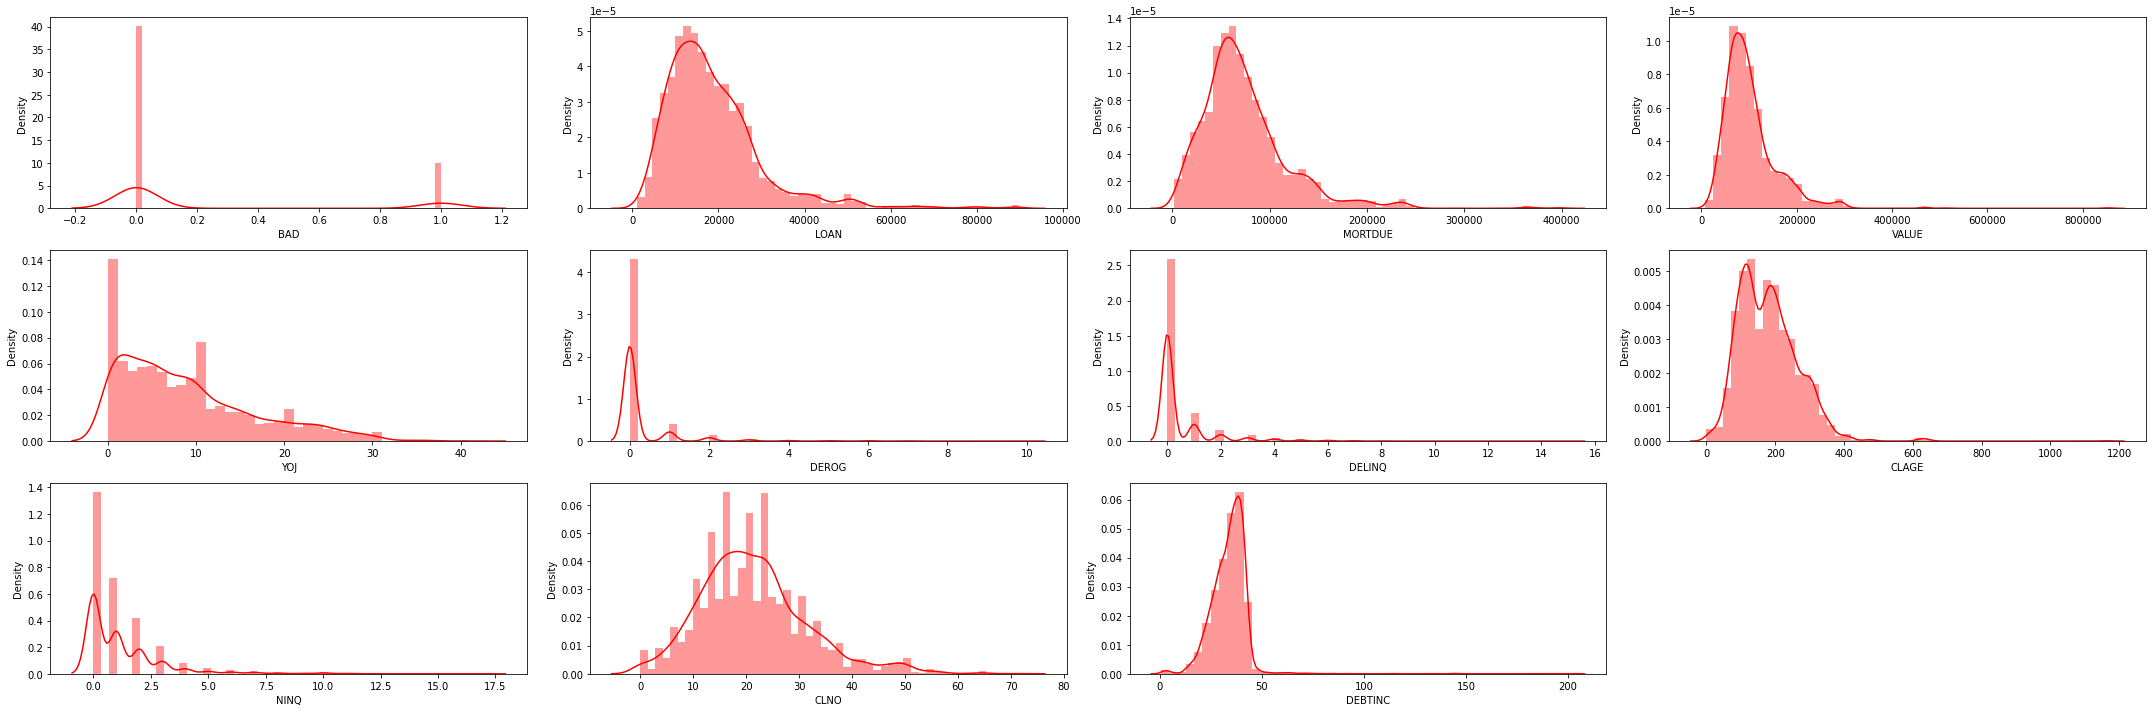

In [9]:
col = numerik.columns

plt.figure(figsize=(30,10))
for i in range(0,len(col)):
  plt.subplot(3,4,i+1)
  sns.distplot(numerik[numerik.columns[i]],color='red')
  plt.tight_layout()

In [10]:
numerik.columns[numerik.isna().any()].to_list()

['MORTDUE',
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

`mengisi missing value menggunakan MICE imputation`

In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from sklearn.impute import IterativeImputer

col = numerik.columns[numerik.isna().any()].to_list()

imputer = IterativeImputer()
numerik[col] = imputer.fit_transform(numerik[col])
numerik.isna().sum()

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


BAD        0
LOAN       0
MORTDUE    0
VALUE      0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

`check distplot setelah missing value diatasi`

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

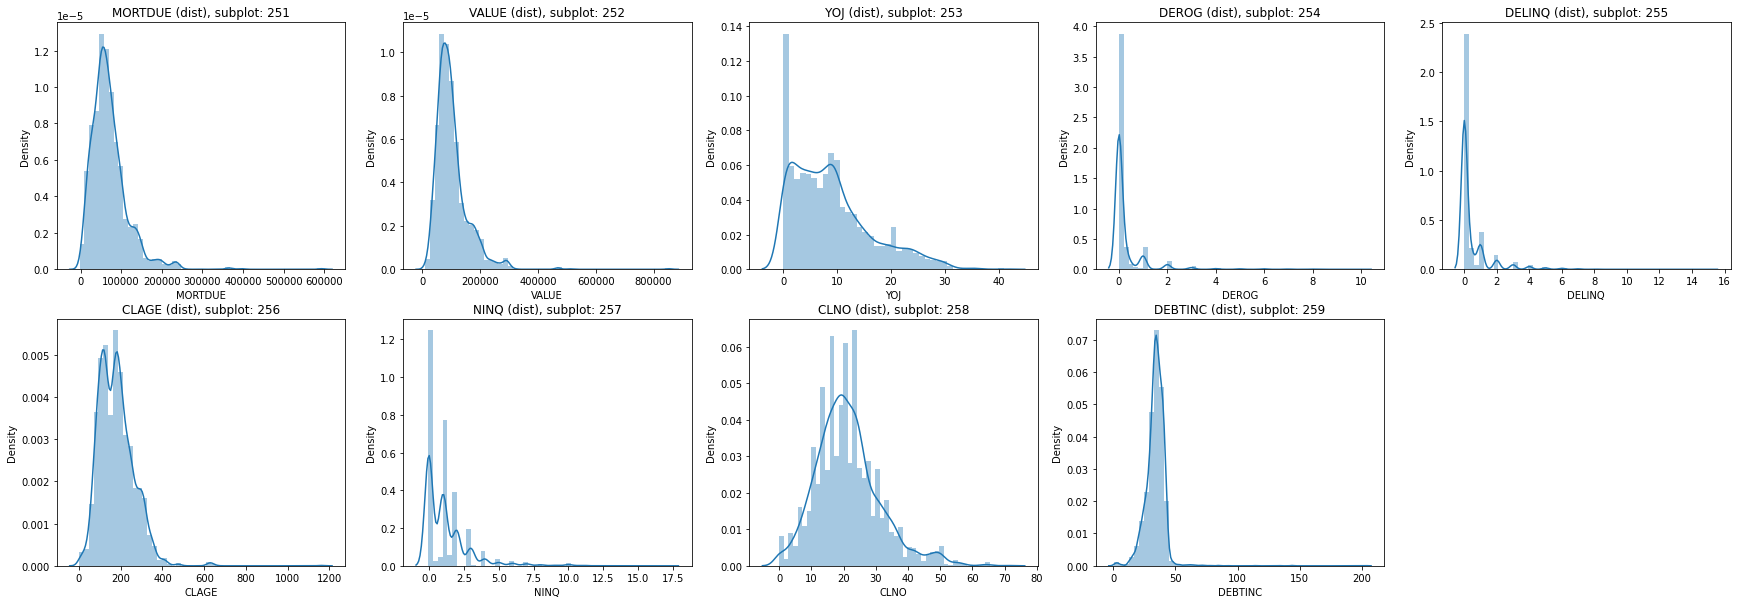

In [12]:
checknum = col

a = 2
b = 5
c = 1

fig = plt.figure(figsize=(30,10))
for i in checknum:
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(numerik[i])
    c = c + 1

plt.show()

***terlihat banyak data mendekati dist normal tetapi memiliki banyak outlier***

In [13]:
kategorik.columns

Index(['REASON', 'JOB', 'Status'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, '')

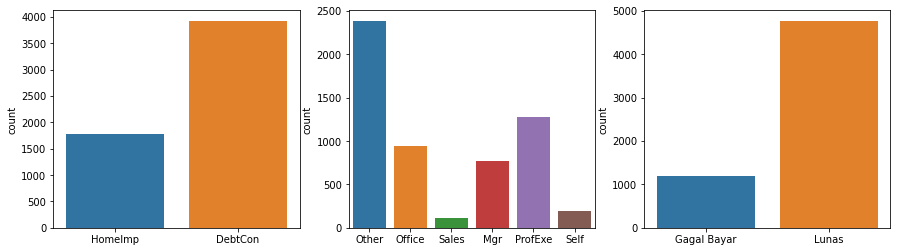

In [14]:
plt.figure(figsize=(15,4))

ax = plt.subplot(131)
sns.countplot(kategorik['REASON'],ax=ax)
plt.xticks(rotation='0')
plt.xlabel(None)

ax = plt.subplot(132)
sns.countplot(kategorik['JOB'],ax=ax)
plt.xticks(rotation='0')
plt.xlabel(None)

ax = plt.subplot(133)
sns.countplot(kategorik['Status'],ax=ax)
plt.xticks(rotation='0')
plt.xlabel(None)

***terdapat embalance data pada variabel target***

`mengisi missing value var kategori menggunakan modus`

In [15]:
modetreat = kategorik.columns[kategorik.isna().any()].to_list()

for i in modetreat:
  kategorik.loc[kategorik.loc[:,i].isna(),i] = kategorik.loc[:,i].mode()[0]

kategorik.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


REASON    0
JOB       0
Status    0
dtype: int64

# EDA

`plot anova`

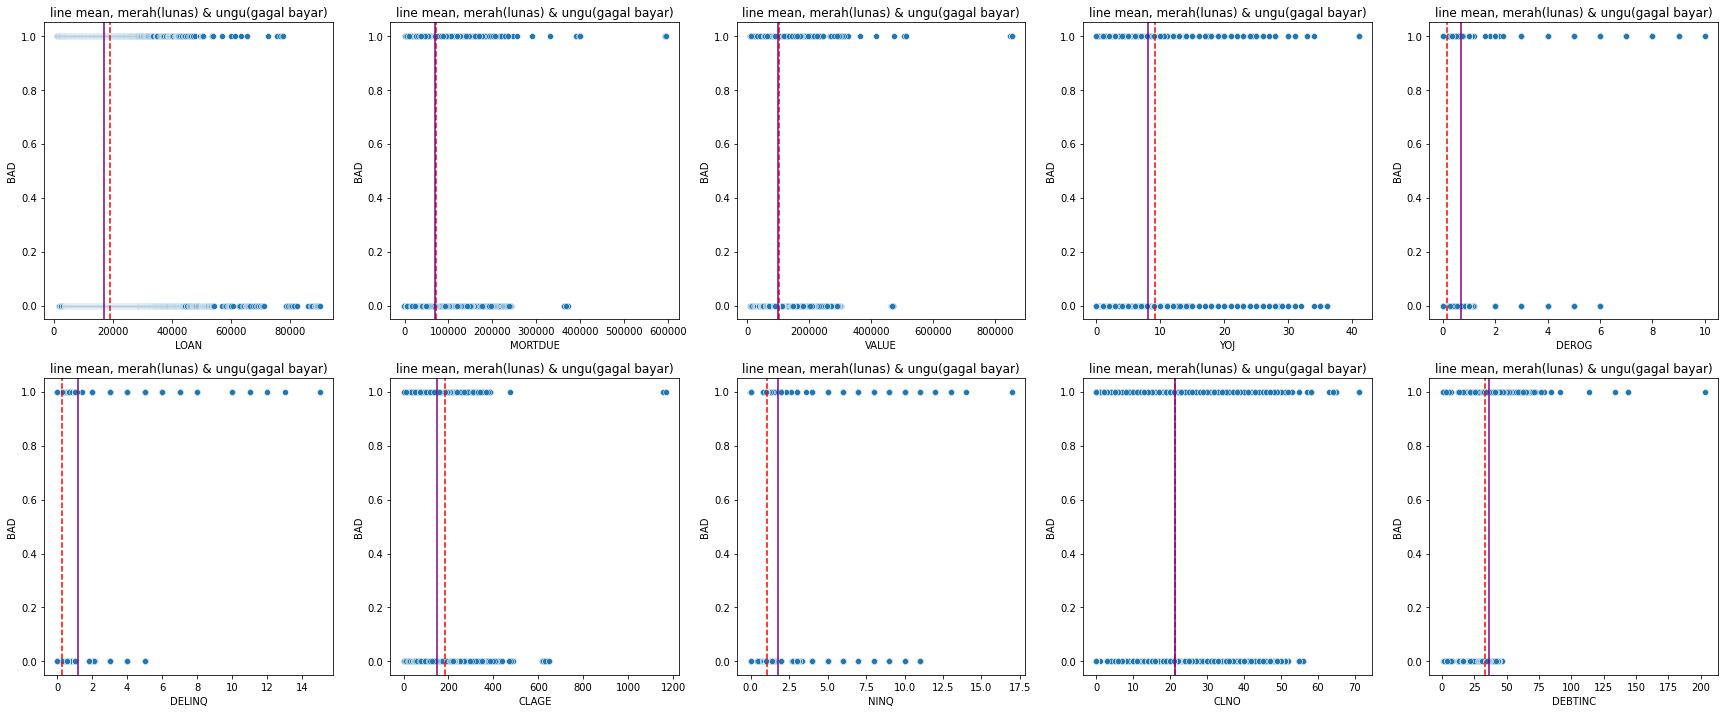

In [16]:
col = numerik.columns[1:11]

a = 2
b = 5
c = 1

fig = plt.figure(figsize=(30,12))
for i in col:
    plt.subplot(a, b, c)
    plt.title('line mean, merah(lunas) & ungu(gagal bayar)')
    plt.xlabel(i)
    x = numerik[numerik.BAD==0]
    y = numerik[numerik.BAD==1]
    sns.scatterplot(data=numerik,y='BAD',x=i,palette="deep")
    plt.axvline(x=x[i].mean(),color='red',ls='--')
    plt.axvline(x=y[i].mean(),color='purple')
    c = c + 1

plt.show()

* LOAN : rata-rata jumlah permintaan pinjaman lunas > gagal bayar
* MORTDUE : tidak ada perbedaan rata-rata jumlah hipotek yang harus dibayar pada pinjaman lunas dan gagal bayar
* VALUE : tidak ada perbedaan rata-rata nilai properti pinjaman lunas dan gagal bayar
* YOJ : rata-rata tahun bekerja pinjman lunas > gagal bayar
* DEROG : rata-rata jumlah laporan penghinaan utama pinjaman gagal bayar > lunas
* DELINQ : rata-rata jumlah kredit macet pinjaman gagal bayar > lunas
* CLAGE : Usia jalur perdagangan tertua dalam beberapa bulan 
* NINQ : Jumlah kredit terbaru yang ditanyakan
* CLNO : Jumlah perdagangan
* DEBTINC : Rasio utang terhadap pendapatan

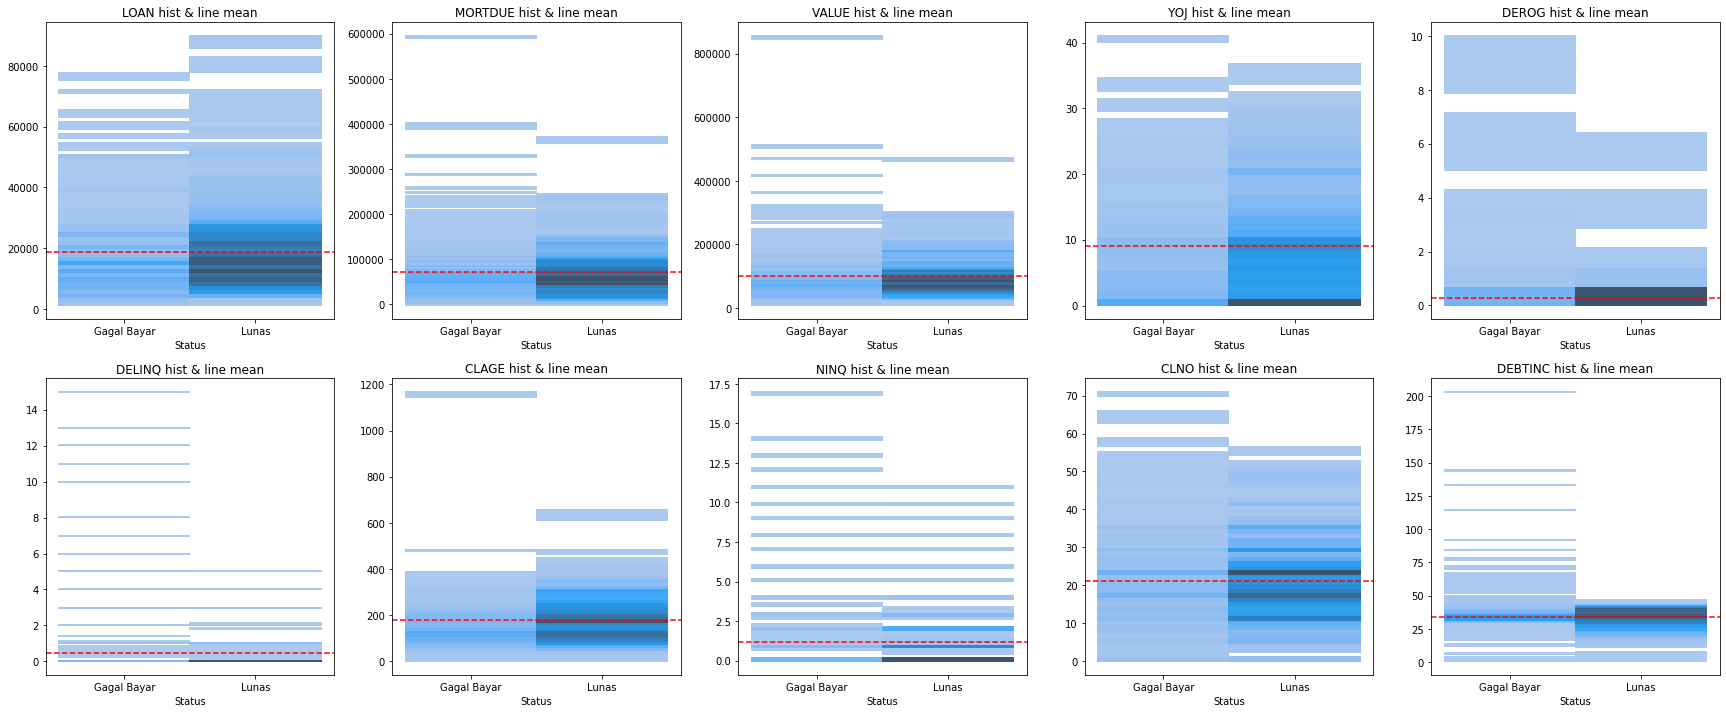

In [17]:
df = numerik.copy()
df.drop(['BAD'],axis=1,inplace=True)

col = df.columns

df = df.join(kategorik['Status'])

a = 2
b = 5
c = 1

fig = plt.figure(figsize=(30,12))
for i in col:
    plt.subplot(a, b, c)
    plt.title('{} hist & line mean'.format(i))
    sns.histplot(data=df, x='Status', y=i)
    plt.axhline(y=df[i].mean(),color='red',ls='--')
    plt.ylabel('')
    c = c + 1

plt.show()

In [18]:
datamean = pd.DataFrame(kategorik['Status'])

datamean['Loan'] = numerik['LOAN'].apply(lambda x:'diatas mean' if x > numerik['LOAN'].mean() else 'dibawah mean')
datamean['Mortdue'] = numerik['MORTDUE'].apply(lambda x:'diatas mean' if x > numerik['MORTDUE'].mean() else 'dibawah mean')
datamean['Value'] = numerik['VALUE'].apply(lambda x:'diatas mean' if x > numerik['VALUE'].mean() else 'dibawah mean')
datamean['Yoj'] = numerik['YOJ'].apply(lambda x:'diatas mean' if x > numerik['YOJ'].mean() else 'dibawah mean')
datamean['Derog'] = numerik['DEROG'].apply(lambda x:'diatas mean' if x > numerik['DEROG'].mean() else 'dibawah mean')
datamean['Delinq'] = numerik['DELINQ'].apply(lambda x:'diatas mean' if x > numerik['DELINQ'].mean() else 'dibawah mean')
datamean['Clage'] = numerik['CLAGE'].apply(lambda x:'diatas mean' if x > numerik['CLAGE'].mean() else 'dibawah mean')
datamean['Ninq'] = numerik['NINQ'].apply(lambda x:'diatas mean' if x > numerik['NINQ'].mean() else 'dibawah mean')
datamean['Clno'] = numerik['CLNO'].apply(lambda x:'diatas mean' if x > numerik['CLNO'].mean() else 'dibawah mean')
datamean['Debtinc'] = numerik['DEBTINC'].apply(lambda x:'diatas mean' if x > numerik['DEBTINC'].mean() else 'dibawah mean')

In [19]:
a = datamean.groupby('Loan')['Status'].value_counts(normalize=True).mul(100).rename('%').reset_index()
a['var'] = 'LOAN';a.rename(columns={'Loan':'keterangan'},inplace=True)

b = datamean.groupby('Mortdue')['Status'].value_counts(normalize=True).mul(100).rename('%').reset_index()
b['var'] = 'MORTDUE';b.rename(columns={'Mortdue':'keterangan'},inplace=True)

c = datamean.groupby('Value')['Status'].value_counts(normalize=True).mul(100).rename('%').reset_index()
c['var'] = 'VALUE';c.rename(columns={'Value':'keterangan'},inplace=True)

d = datamean.groupby('Yoj')['Status'].value_counts(normalize=True).mul(100).rename('%').reset_index()
d['var'] = 'YOJ';d.rename(columns={'Yoj':'keterangan'},inplace=True)

e = datamean.groupby('Derog')['Status'].value_counts(normalize=True).mul(100).rename('%').reset_index()
e['var'] = 'DEROG';e.rename(columns={'Derog':'keterangan'},inplace=True)

f = datamean.groupby('Delinq')['Status'].value_counts(normalize=True).mul(100).rename('%').reset_index()
f['var'] = 'DELINQ';f.rename(columns={'Delinq':'keterangan'},inplace=True)

g = datamean.groupby('Clage')['Status'].value_counts(normalize=True).mul(100).rename('%').reset_index()
g['var'] = 'CLAGE';g.rename(columns={'Clage':'keterangan'},inplace=True)

h = datamean.groupby('Ninq')['Status'].value_counts(normalize=True).mul(100).rename('%').reset_index()
h['var'] = 'NINQ';h.rename(columns={'Ninq':'keterangan'},inplace=True)

i = datamean.groupby('Clno')['Status'].value_counts(normalize=True).mul(100).rename('%').reset_index()
i['var'] = 'CLNO';i.rename(columns={'Clno':'keterangan'},inplace=True)

j = datamean.groupby('Debtinc')['Status'].value_counts(normalize=True).mul(100).rename('%').reset_index()
j['var'] = 'DEBTINC';j.rename(columns={'Debtinc':'keterangan'},inplace=True)

listdata = [a,b,c,d,e,f,g,h,i,j]
datamean = pd.concat(listdata)
datamean.head()

,keterangan,Status,%,var
0,diatas mean,Lunas,83.381683,LOAN
1,diatas mean,Gagal Bayar,16.618317,LOAN
2,dibawah mean,Lunas,77.784043,LOAN
3,dibawah mean,Gagal Bayar,22.215957,LOAN
0,diatas mean,Lunas,83.078196,MORTDUE


In [20]:
numerik.drop('BAD',axis=1).describe().loc[['mean']]

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
mean,18607.969799,70988.545375,101779.25198,8.989382,0.266951,0.453748,178.900319,1.186036,21.248064,33.8755


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


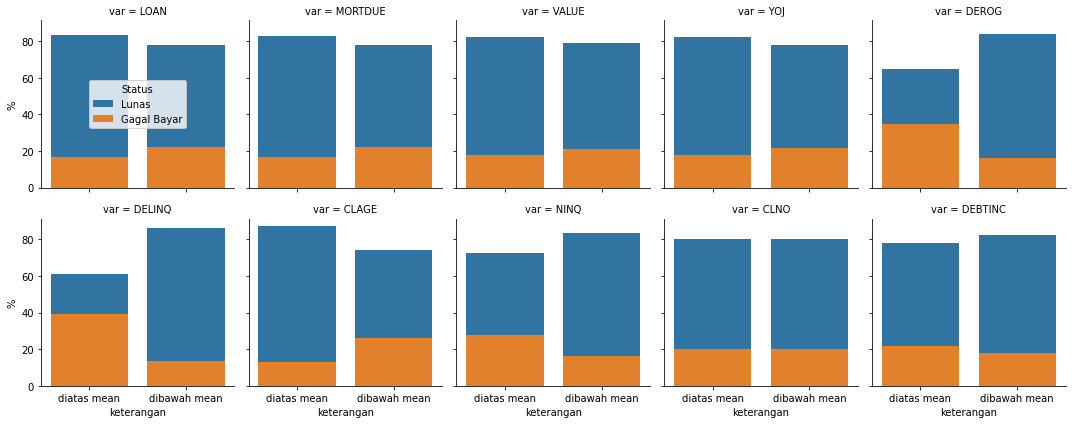

In [21]:
gridplot = sns.FacetGrid(data=datamean, col='var', hue='Status', col_wrap=5,legend_out=False)
gridplot.map(sns.barplot, 'keterangan', '%')
gridplot.add_legend(loc='center')

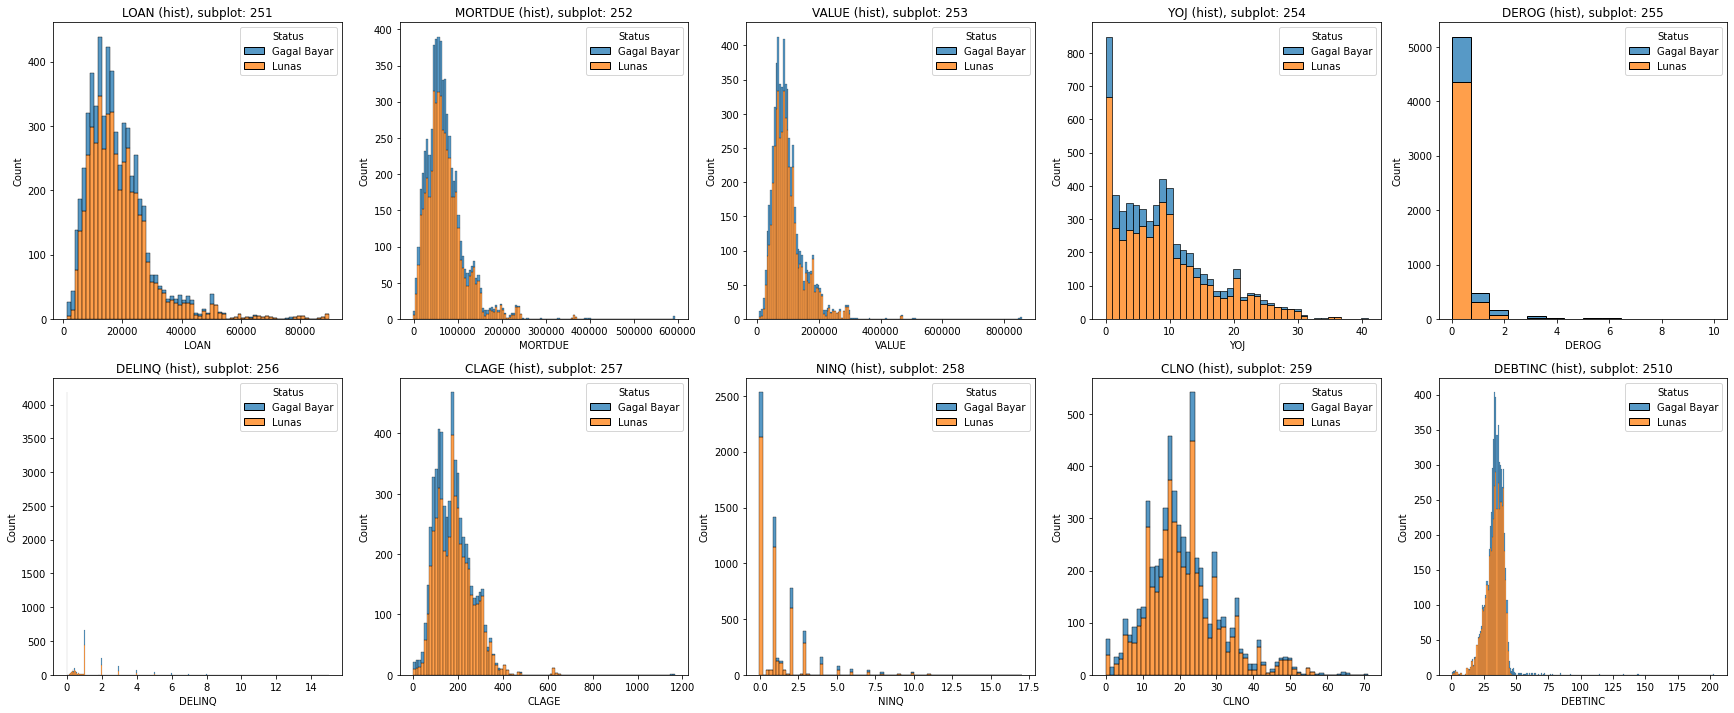

In [22]:
df = numerik.copy()
df.drop(['BAD'],axis=1,inplace=True)

col = df.columns

df = df.join(kategorik['Status'])

a = 2
b = 5
c = 1

fig = plt.figure(figsize=(30,12))
for i in col:
    plt.subplot(a, b, c)
    plt.title('{} (hist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.histplot(data=df, x=i, hue="Status", multiple="stack")
    c = c + 1

plt.show()

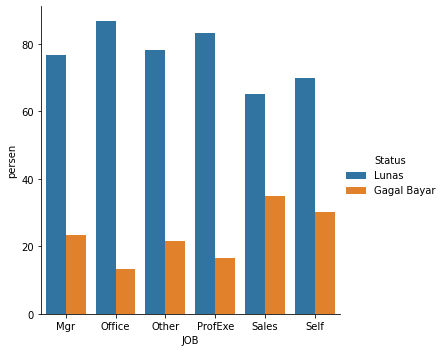

In [23]:
df = kategorik.groupby('JOB')['Status'].value_counts(normalize=True).mul(100).rename('persen').reset_index()
sns.catplot(data=df,x='JOB',y='persen',hue='Status',kind='bar')

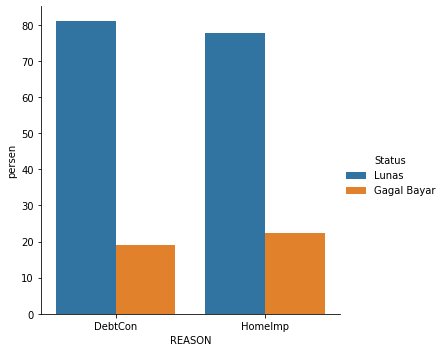

In [24]:
df = kategorik.groupby('REASON')['Status'].value_counts(normalize=True).mul(100).rename('persen').reset_index()
sns.catplot(data=df,x='REASON',y='persen',hue='Status',kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


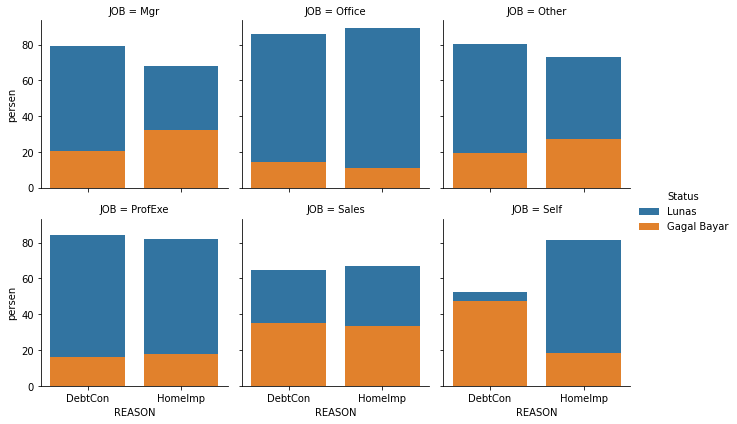

In [25]:
df = kategorik.groupby(['JOB','REASON'])['Status'].value_counts(normalize=True).mul(100).rename('persen').reset_index()

gridplot = sns.FacetGrid(data=df, col='JOB', hue='Status', col_wrap=3)
gridplot.map(sns.barplot, 'REASON', 'persen')
gridplot.add_legend(loc='center right')

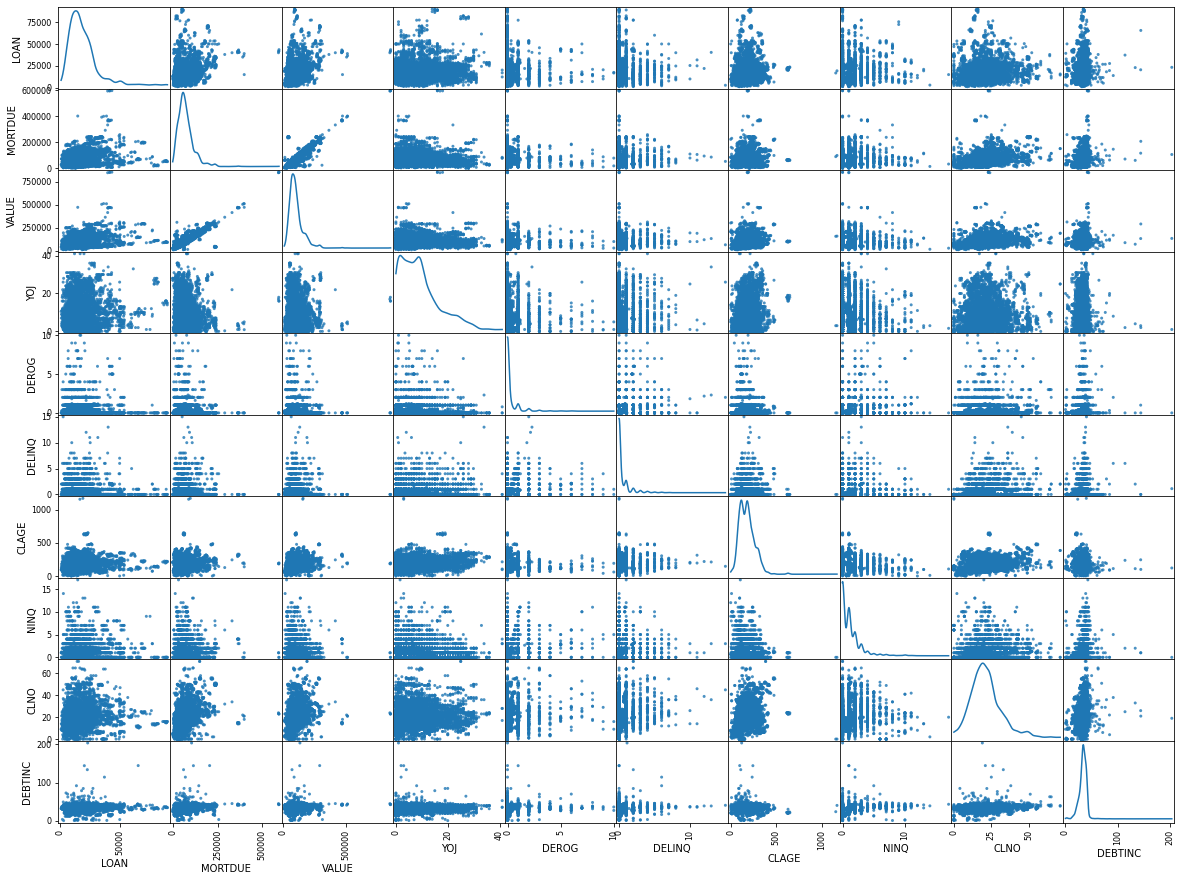

In [26]:
df = numerik.copy()
df.drop(['BAD'],axis=1,inplace=True)
pd.plotting.scatter_matrix(df, alpha=0.8, diagonal='kde', figsize=(20, 15));

In [27]:
korelasi = numerik.drop('BAD',axis=1).corr().style.background_gradient(sns.light_palette('red', as_cmap=True))
korelasi

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
LOAN,1.000000,0.228569,0.331892,0.104061,-0.001589,-0.025773,0.086985,0.049267,0.076245,0.084953
MORTDUE,0.228569,1.000000,0.896879,-0.078327,-0.047244,0.003706,0.127219,0.032211,0.350993,0.207374
VALUE,0.331892,0.896879,1.000000,0.000146,-0.048317,-0.006004,0.176783,-0.006784,0.271876,0.146034
YOJ,0.104061,-0.078327,0.000146,1.000000,-0.069342,0.032633,0.217903,-0.082406,0.022204,-0.061953
DEROG,-0.001589,-0.047244,-0.048317,-0.069342,1.000000,0.238560,-0.080664,0.195456,0.067675,0.033917
DELINQ,-0.025773,0.003706,-0.006004,0.032633,0.238560,1.000000,0.026211,0.076369,0.168281,0.069513
CLAGE,0.086985,0.127219,0.176783,0.217903,-0.080664,0.026211,1.000000,-0.121021,0.247371,-0.041773
NINQ,0.049267,0.032211,-0.006784,-0.082406,0.195456,0.076369,-0.121021,1.000000,0.090885,0.169467
CLNO,0.076245,0.350993,0.271876,0.022204,0.067675,0.168281,0.247371,0.090885,1.000000,0.212973
DEBTINC,0.084953,0.207374,0.146034,-0.061953,0.033917,0.069513,-0.041773,0.169467,0.212973,1.000000


In [28]:
x = numerik['VALUE']-numerik['MORTDUE']
print('jumlah peminjaman nilai properti > nilai KPR',x[x>0].shape)
print('jumlah peminjaman nilai properti < nilai KPR',x[x<0].shape)

jumlah peminjaman nilai properti > nilai KPR (5907,)
jumlah peminjaman nilai properti < nilai KPR (53,)


*variabel kategori tidak balance maka tidak dimasukkan dalam data*

`menggabungkan data numerik dan kategorik`

In [29]:
dataset = numerik.join(kategorik)
dataset.shape

(5960, 14)

`select feature with ANOVA,ChiSquare`

In [30]:
dataset.drop('Status',axis=1,inplace=True)

dataset_x = dataset.select_dtypes(exclude='object')
dataset_y = dataset.select_dtypes(include='object')

In [31]:
from sklearn.feature_selection import SelectKBest, f_classif,chi2
from sklearn.preprocessing import OneHotEncoder

In [32]:
#ANOVA
Xnum = dataset_x.drop(['BAD'],axis=1)
ycat = dataset_x['BAD']

anova = SelectKBest(score_func=f_classif,k='all').fit(Xnum,ycat)
col = Xnum.columns

pvalue = []
for i in anova.pvalues_:
  pvalue.append("{:.10f}".format(i))

pd.Series(pvalue,col)

LOAN       0.0000000064
MORTDUE    0.0629843134
VALUE      0.0299033682
YOJ        0.0000016716
DEROG      0.0000000000
DELINQ     0.0000000000
CLAGE      0.0000000000
NINQ       0.0000000000
CLNO       0.8151318699
DEBTINC    0.0000000000
dtype: object

In [33]:
#Chi Square
from sklearn.preprocessing import LabelEncoder

kategorik2 = dataset_y.copy()
col = kategorik2.columns
kategorik2[col] = kategorik2[col].apply(LabelEncoder().fit_transform)

Xcat = kategorik2
ycat = dataset_x['BAD']

score, pval = chi2(Xcat,ycat)
pval = pd.Series(pval)
pval.index = Xcat.columns
print(pval)

REASON    0.015283
JOB       0.157577
dtype: float64


#Data Preprocessing

`dataset dengan select feature `

In [34]:
dataset_sf = dataset.drop(['CLNO','MORTDUE','JOB'],axis=1)

dataset_sf_x = dataset_sf.select_dtypes(exclude='object')
dataset_sf_y = pd.get_dummies(dataset_sf['REASON'])
dataset_sf = pd.concat([dataset_sf_x,dataset_sf_y],axis=1)

X_sf = dataset_sf.drop('BAD',axis=1)
y_sf = dataset_sf['BAD']

`dataset tanpa select feature`

In [35]:
from sklearn.preprocessing import OneHotEncoder

dataset_y = pd.get_dummies(dataset_y)

dataset = pd.concat([dataset_x,dataset_y],axis=1)

X = dataset.drop('BAD',axis=1)
y = dataset['BAD']

`check embalance var target`

In [36]:
dataset['BAD'].value_counts()

0    4771
1    1189
Name: BAD, dtype: int64

*perlu dilakukan embalance data untuk data target*

`partisi data latih dan test untuk model`

In [37]:
from sklearn.model_selection import train_test_split

#std
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

#robust
X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,test_size=0.3,random_state=321)

#selectfitur
X_train3,X_test3,y_train3,y_test3 = train_test_split(X_sf,y_sf,test_size=0.3,random_state=231)

`teknik oversampling dalam menyeimbangkan variabel target`

In [38]:
from pandas.core.common import random_state
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto',random_state=123)
X_train,y_train = smote.fit_resample(X_train,y_train)

smote2 = SMOTE(sampling_strategy='auto',random_state=123)
X_train2,y_train2 = smote2.fit_resample(X_train2,y_train2)

smote3 = SMOTE(sampling_strategy='auto',random_state=123)
X_train3,y_train3 = smote3.fit_resample(X_train3,y_train3)

`Standardization`

1. Standart Scaller untuk yang distribusinya skew
2. Robust Scaller - banyak outlier

`karena data kita terdapat banyak outlier maka akan dilakukan scaling dan robust`

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

col = X.select_dtypes(exclude='uint8').columns
col2 = X_sf.select_dtypes(exclude='uint8').columns

#standarisasi
stdSc = StandardScaler()
X_train.loc[:, col] = stdSc.fit_transform(X_train.loc[:, col])
X_test.loc[:, col] = stdSc.transform(X_test.loc[:, col])

#robust
RbSc = RobustScaler()
X_train2.loc[:, col] = RbSc.fit_transform(X_train2.loc[:, col])
X_test2.loc[:, col] = RbSc.fit_transform(X_test2.loc[:, col])

#standarisasi selectfitur
std = StandardScaler()
X_train3.loc[:, col2] = std.fit_transform(X_train3.loc[:, col2])
X_test3.loc[:, col2] = std.transform(X_test3.loc[:, col2])

# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
dt_acc= accuracy_score(y_test,y_pred) 
dt_rec= recall_score(y_test,y_pred, average='macro') 
dt_pre= precision_score(y_test,y_pred, average='macro') 
print("accuracy score : ",dt_acc)
print("precision score : ",dt_rec)
print("recall score : ",dt_pre)
print('')

dt_Rb = DecisionTreeClassifier()
dt_Rb.fit(X_train2, y_train2)

y_pred2 = dt_Rb.predict(X_test2)
dtRb_acc= accuracy_score(y_test2,y_pred2) 
dtRb_rec= recall_score(y_test2,y_pred2, average='macro') 
dtRb_pre= precision_score(y_test2,y_pred2, average='macro') 
print("accuracy score with robust: ",dtRb_acc)
print("precision score with robust: ",dtRb_rec)
print("recall score with robust: ",dtRb_pre)
print('')

dt_sf = DecisionTreeClassifier()
dt_sf.fit(X_train3, y_train3)

y_pred3 = dt_sf.predict(X_test3)
dtSf_acc= accuracy_score(y_test3,y_pred3) 
dtSf_rec= recall_score(y_test3,y_pred3, average='macro') 
dtSf_pre= precision_score(y_test3,y_pred3, average='macro') 
print("accuracy score with selectfeature: ",dtSf_acc)
print("precision score with selectfeature: ",dtSf_rec)
print("recall score with selectfeature: ",dtSf_pre)

accuracy score :  0.8624161073825504
precision score :  0.7819444444444444
recall score :  0.7867458533806027

accuracy score with robust:  0.75
precision score with robust:  0.7383332180489267
recall score with robust:  0.6730320966092734

accuracy score with selectfeature:  0.8461968680089486
precision score with selectfeature:  0.7670693996082671
recall score with selectfeature:  0.7611855294332057


#Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
rf_acc= accuracy_score(y_test,y_pred) 
rf_rec= recall_score(y_test,y_pred, average='macro') 
rf_pre= precision_score(y_test,y_pred, average='macro') 
print("accuracy score : ",rf_acc)
print("precision score : ",rf_rec)
print("recall score : ",rf_pre)
print('')

rf_Rb = RandomForestClassifier()
rf_Rb.fit(X_train2, y_train2)

y_pred2 = rf_Rb.predict(X_test2)
rfRb_acc= accuracy_score(y_test2,y_pred2) 
rfRb_rec= recall_score(y_test2,y_pred2, average='macro') 
rfRb_pre= precision_score(y_test2,y_pred2, average='macro') 
print("accuracy score with robust: ",rfRb_acc)
print("precision score with robust: ",rfRb_rec)
print("recall score with robust: ",rfRb_pre)
print('')

rf_sf = RandomForestClassifier()
rf_sf.fit(X_train3, y_train3)

y_pred3 = rf_sf.predict(X_test3)
rfSf_acc= accuracy_score(y_test3,y_pred3) 
rfSf_rec= recall_score(y_test3,y_pred3, average='macro') 
rfSf_pre= precision_score(y_test3,y_pred3, average='macro') 
print("accuracy score with selectfeature: ",rfSf_acc)
print("precision score with selectfeature: ",rfSf_rec)
print("recall score with selectfeature: ",rfSf_pre)

accuracy score :  0.9239373601789709
precision score :  0.843312324929972
recall score :  0.9108508003314928

accuracy score with robust:  0.8378076062639821
precision score with robust:  0.822957736736529
recall score with robust:  0.7584953248031496

accuracy score with selectfeature:  0.9060402684563759
precision score with selectfeature:  0.8262884186455517
recall score with selectfeature:  0.8696914445077386


`terlihat akurasi tinggi dari RF metode std maka akan dilakukan check overfitting`

In [42]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print('Training set accuracy: ', accuracy_score(y_train, y_pred_train))
print('Test set accuracy: ', accuracy_score(y_test, y_pred_test))

Training set accuracy:  1.0
Test set accuracy:  0.9239373601789709


*terjadi overfitting dalam model RandomForest*

#KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
knn_acc= accuracy_score(y_test,y_pred) 
knn_rec= recall_score(y_test,y_pred, average='macro') 
knn_pre= precision_score(y_test,y_pred, average='macro') 
print("accuracy score : ",knn_acc)
print("precision score : ",knn_rec)
print("recall score : ",knn_pre)
print('')

knn_Rb = KNeighborsClassifier()
knn_Rb.fit(X_train2, y_train2)

y_pred2 = knn_Rb.predict(X_test2)
knnRb_acc= accuracy_score(y_test2,y_pred2) 
knnRb_rec= recall_score(y_test2,y_pred2, average='macro') 
knnRb_pre= precision_score(y_test2,y_pred2, average='macro') 
print("accuracy score with robust: ",knnRb_acc)
print("precision score with robust: ",knnRb_rec)
print("recall score with robust: ",knnRb_pre)
print('')

knn_sf = KNeighborsClassifier()
knn_sf.fit(X_train3, y_train3)

y_pred3 = knn_sf.predict(X_test3)
knnSf_acc= accuracy_score(y_test3,y_pred3) 
knnSf_rec= recall_score(y_test3,y_pred3, average='macro') 
knnSf_pre= precision_score(y_test3,y_pred3, average='macro') 
print("accuracy score with selectfeature: ",knnSf_acc)
print("precision score with selectfeature: ",knnSf_rec)
print("recall score with selectfeature: ",knnSf_pre)

accuracy score :  0.9362416107382551
precision score :  0.8499766573295986
recall score :  0.9500015007053315

accuracy score with robust:  0.860738255033557
precision score with robust:  0.8160694934403172
recall score with robust:  0.7839739329334081

accuracy score with selectfeature:  0.8970917225950783
precision score with selectfeature:  0.8144743150984088
recall score with selectfeature:  0.8526756460801965


`terlihat akurasi tinggi dari KNN metode std maka akan dilakukan check overfitting`

In [44]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

print('Training set accuracy: ', accuracy_score(y_train, y_pred_train))
print('Test set accuracy: ', accuracy_score(y_test, y_pred_test))

Training set accuracy:  0.9801076877056536
Test set accuracy:  0.9362416107382551


*terjadi overfitting dalam model KNN*

#SVM

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

svm = SVC(probability=True)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
svm_acc= accuracy_score(y_test,y_pred) 
svm_rec= recall_score(y_test,y_pred, average='macro') 
svm_pre= precision_score(y_test,y_pred, average='macro') 
print("accuracy score : ",svm_acc)
print("precision score : ",svm_rec)
print("recall score : ",svm_pre)
print('')

svm_Rb = SVC(probability=True)
svm_Rb.fit(X_train2, y_train2)

y_pred2 = svm_Rb.predict(X_test2)
svmRb_acc= accuracy_score(y_test2,y_pred2) 
svmRb_rec= recall_score(y_test2,y_pred2, average='macro') 
svmRb_pre= precision_score(y_test2,y_pred2, average='macro') 
print("accuracy score with robust: ",svmRb_acc)
print("precision score with robust: ",svmRb_rec)
print("recall score with robust: ",svmRb_pre)
print('')

svm_sf = SVC(probability=True)
svm_sf.fit(X_train3, y_train3)

y_pred3 = svm_sf.predict(X_test3)
svmSf_acc= accuracy_score(y_test3,y_pred3) 
svmSf_rec= recall_score(y_test3,y_pred3, average='macro') 
svmSf_pre= precision_score(y_test3,y_pred3, average='macro') 
print("accuracy score with selectfeature: ",svmSf_acc)
print("precision score with selectfeature: ",svmSf_rec)
print("recall score with selectfeature: ",svmSf_pre)

accuracy score :  0.8758389261744967
precision score :  0.7581465919701214
recall score :  0.827793860472469

accuracy score with robust:  0.8008948545861297
precision score with robust:  0.7185907634133407
recall score with robust:  0.6999978904288758

accuracy score with selectfeature:  0.837248322147651
precision score with selectfeature:  0.735596829642801
recall score with selectfeature:  0.7476372168945113


#Parameter Tuning KNN

`membandingkan K terbaik dan rating error terkecil`

In [46]:
rating_error = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    rating_error.append(np.mean(pred_i != y_test))
    akurasi = accuracy_score(y_test,pred_i)

    if akurasi > 0.9:
      print('akurasi KNN dengan K(',i,'):',akurasi)
    else:
      None

akurasi KNN dengan K( 1 ): 0.9440715883668904
akurasi KNN dengan K( 2 ): 0.9250559284116331
akurasi KNN dengan K( 3 ): 0.9423937360178971
akurasi KNN dengan K( 4 ): 0.9272930648769575
akurasi KNN dengan K( 5 ): 0.9362416107382551
akurasi KNN dengan K( 6 ): 0.9250559284116331
akurasi KNN dengan K( 7 ): 0.9177852348993288
akurasi KNN dengan K( 8 ): 0.9060402684563759


*K=1 merupakan parameter terbaik memberikan akurasi lebih tinggi*

Text(0, 0.5, 'Rating Error')

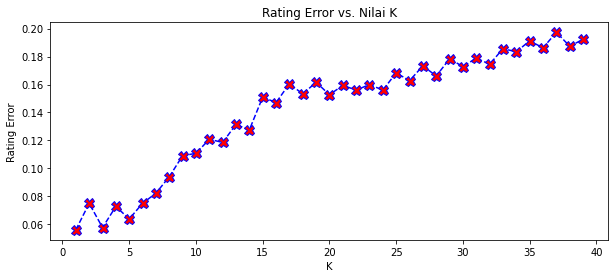

In [47]:
plt.figure(figsize=(10,4))
plt.plot(range(1,40),rating_error,color='blue', linestyle='dashed', marker='X',
         markerfacecolor='red', markersize=10)
plt.title('Rating Error vs. Nilai K')
plt.xlabel('K')
plt.ylabel('Rating Error')

`membandingkan leaf size terbaik dengan k=1`

In [48]:
for i in np.linspace(0,1000,20):
    
    knn = KNeighborsClassifier(n_neighbors=1,leaf_size=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    akurasi = accuracy_score(y_test,pred_i)

    if akurasi > 0.9:
      print('akurasi KNN dengan leaf size(',i,'):',akurasi)
    else:
      None

akurasi KNN dengan leaf size( 0.0 ): 0.9440715883668904
akurasi KNN dengan leaf size( 52.63157894736842 ): 0.9440715883668904
akurasi KNN dengan leaf size( 105.26315789473684 ): 0.9440715883668904
akurasi KNN dengan leaf size( 157.89473684210526 ): 0.9440715883668904
akurasi KNN dengan leaf size( 210.52631578947367 ): 0.9440715883668904
akurasi KNN dengan leaf size( 263.1578947368421 ): 0.9440715883668904
akurasi KNN dengan leaf size( 315.7894736842105 ): 0.9440715883668904
akurasi KNN dengan leaf size( 368.4210526315789 ): 0.9440715883668904
akurasi KNN dengan leaf size( 421.05263157894734 ): 0.9440715883668904
akurasi KNN dengan leaf size( 473.6842105263158 ): 0.9440715883668904
akurasi KNN dengan leaf size( 526.3157894736842 ): 0.9440715883668904
akurasi KNN dengan leaf size( 578.9473684210526 ): 0.9440715883668904
akurasi KNN dengan leaf size( 631.578947368421 ): 0.9440715883668904
akurasi KNN dengan leaf size( 684.2105263157895 ): 0.9440715883668904
akurasi KNN dengan leaf size( 7

*tidak terdapat perbedaan signifikan maka leaf size tidak dimasukkan dalam GridCV*

In [49]:
from sklearn.model_selection import GridSearchCV

grid_parameter = { 'n_neighbors' : [1,2,3,4,5,6,7,8],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [50]:
gridcv = GridSearchCV(KNeighborsClassifier(), grid_parameter, verbose = 1, cv=5, n_jobs = -1)
gridcv_res = gridcv.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [51]:
gridcv_res.best_score_

0.9860932883002237

In [52]:
gridcv_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

`modeling setelah didapatkan parameter terbaik`

In [53]:
knn = KNeighborsClassifier(n_neighbors = 1, weights = 'uniform',metric = 'manhattan')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

`check overfitting`

In [54]:
from sklearn.metrics import accuracy_score

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

print('Training set accuracy: ', accuracy_score(y_train, y_pred_train))
print('Test set accuracy: ', accuracy_score(y_test, y_pred_test))

Training set accuracy:  1.0
Test set accuracy:  0.9457494407158836


#Evaluasi Model

`evaluasi model dengan confusion matriks`

In [55]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1423    5]
 [  92  268]]

True Positives(TP) =  1423
True Negatives(TN) =  268
False Positives(FP) =  5
False Negatives(FN) =  92


In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1428
           1       0.98      0.74      0.85       360

    accuracy                           0.95      1788
   macro avg       0.96      0.87      0.91      1788
weighted avg       0.95      0.95      0.94      1788



In [57]:
from sklearn import metrics

auc_roc= metrics.roc_auc_score(y_test,y_pred_test)
auc_roc

0.8704715219421102

In [58]:
TP = cm[0,0] #true positif
TN = cm[1,1] #true negatif
FP = cm[0,1] #false positif
FN = cm[1,0] #false negatif

In [59]:
accuracy = (TP+TN) / float(TP+TN+FP+FN)
print('Classification accuracy : {0:0.4f}'.format(accuracy))

Classification accuracy : 0.9457


In [60]:
class_error = (FP+FN) / float(TP+TN+FP+FN)
print('Classification Error : {0:0.4f}'.format(class_error))

Classification Error : 0.0543


In [61]:
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9965


In [62]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity or TPR : {0:0.4f}'.format(recall))

Recall or Sensitivity or TPR : 0.9393


`dapat dilihat bahwa presisi > sensitivitas`

*mesin lebih condong memprediksi kredit yang lunas, ternyata sebenarnya gagal bayar. *

1. TRUE POSITIVE RATE (TPR)

In [63]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9393


2. FALSE POSITIVE RATE (FPR)

In [64]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0183


3. Spacificity

In [65]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9817


## ROC AOC 

---



Text(0.5, 1.0, 'Precision-Recall Curve')

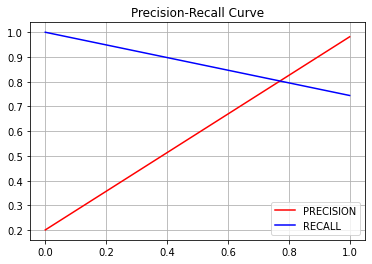

In [68]:
from sklearn.metrics import precision_recall_curve
y_prob = knn.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_prob)

plt.plot(threshold, precision[:-1], c ='r', label ='PRECISION')
plt.plot(threshold, recall[:-1], c ='b', label ='RECALL')
plt.grid()
plt.legend()
plt.title('Precision-Recall Curve')

In [70]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8704715219421102

`0,8-0,9 = Diskriminasi yang sangat baik.`

Text(0.5, 0, 'False Positive Rate')

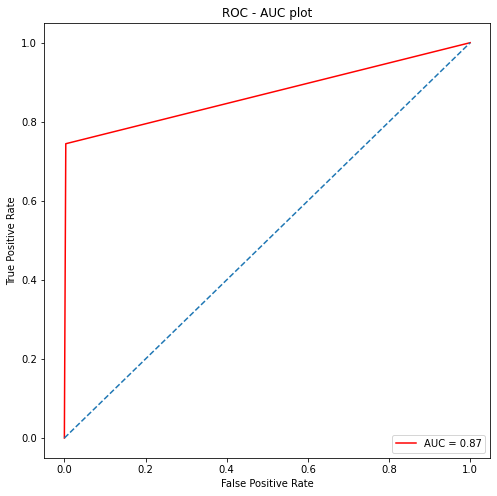

In [71]:
plt.figure(figsize=(8,8))

plt.title('ROC - AUC plot')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')